### Check if an element is in a collection 
Reduces computation complexity (O(n) to O(log n))                 
    
    search (A,t)
      low = 0
      high = n-1
      while low<= high do
          mid = (low+high)/2
          if t = A[mid] then
              return true
          elseif t<A[mid] then
              high = mid-1
          else 
              low = mid+1
       return false
    end

#### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from time import time
%matplotlib inline

#### Compare speed

In [2]:
def check_speed(function_):
    '''
    args:
        function_(function): to be tested
    return:
        performance(list)
    '''
    performance = []
    n = 2**20
    while n < 2**28:
        sorted = [k for k in range(n)]
        # worst case (max) where item not found
        t0 = time()*1000 # miliseconds
        function_(sorted,-1)
        t1 = time()*1000 # miliseconds
        t_delta = (t1-t0)
        n *= 2
        performance.append((n,t_delta))
    return performance

#### Standard python function

In [6]:
def python_in (list_, target):
    '''
    args:
        list_(list): ordered in asc order
        target(element): single value
    return:
        True|False
    '''
    return target in list_

#### Simple binary search

In [7]:
def binarySearch(list_,target):
    '''
    args:
        list_(list): ordered in asc order
        target(element): single value
    return:
        True|False
    '''
    # set low and high, get middle
    # while low<=high  itereate until no number unexplored
        # if target = list_[middle]:
            # return true
        # elif  target> list_[middle]:
            # target is on the right hand side so low = middle +1 and high is still the last element
        # else
            # target is on the left hand side so high = middle -1 and low is the same as the first element
    low = 0 # first element
    high = len(list_)-1 # last element
    while low<=high: #iterate until no element left unexplored
        middle = int((low+high)/2)
        if target == list_[middle]:
            return True
        elif target < list_[middle]:
            high = middle - 1 
        else:
            low = middle + 1
    return False         

#### Plot comparisions

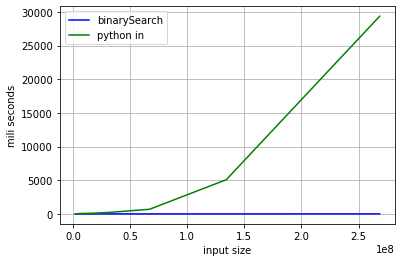

In [8]:
# collect results
performance_bs = check_speed(binarySearch)
performance_pi = check_speed(python_in)
# transfer results to data frames
bs = pd.DataFrame(performance_bs)
bs.columns=['input_size','mseconds']
pi = pd.DataFrame(performance_pi)
pi.columns=['input_size','mseconds']
# plot
fig, ax = plt.subplots()
_=ax.plot(bs.input_size,bs['mseconds'],label='binarySearch',color='blue')
_=ax.plot(pi.input_size,pi['mseconds'],label='python in',color='green')
_=ax.legend()
_=ax.grid()
_=ax.set_xlabel('input size')
_=ax.set_ylabel('mili seconds')